In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras import initializers
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

2022-07-16 04:48:57.663125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-16 04:48:57.663177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df = pd.read_csv('weatherAUS-preprocess.csv')

In [5]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

X.shape

(127536, 26)

In [8]:
y_train.value_counts()

0    70110
1    19165
Name: RainTomorrow, dtype: int64

In [7]:
y_test.value_counts()

0    30047
1     8214
Name: RainTomorrow, dtype: int64

## ANN with dropout and weight initializer

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 15s 4ms/step - loss: 0.4891 - accuracy: 0.7856 - val_loss: 0.3949 - val_accuracy: 0.7838
Epoch 2/150
2232/2232 [==============================] - 13s 6ms/step - loss: 0.4190 - accuracy: 0.7857 - val_loss: 0.3879 - val_accuracy: 0.7838
Epoch 3/150
2232/2232 [==============================] - 13s 6ms/step - loss: 0.4162 - accuracy: 0.7857 - val_loss: 0.3847 - val_accuracy: 0.7838
Epoch 4/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.4127 - accuracy: 0.7857 - val_loss: 0.3823 - val_accuracy: 0.7838
Epoch 5/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.4124 - accuracy: 0.8038 - val_loss: 0.3785 - val_accuracy: 0.8426
Epoch 6/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.4085 - accuracy: 0.8130 - val_loss: 0.3747 - val_accuracy: 0.8456
Epoch 7/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.4064 - accuracy: 0.8138 - val_loss: 0.3718 - val

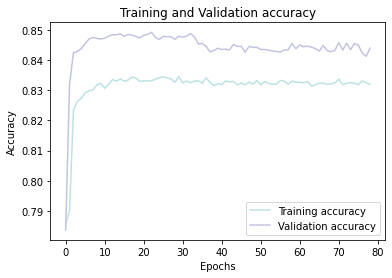

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

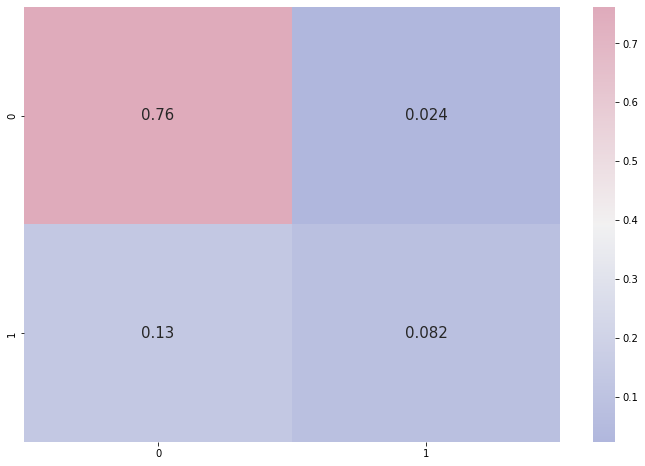

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     30047
           1       0.78      0.38      0.51      8214

    accuracy                           0.84     38261
   macro avg       0.81      0.68      0.71     38261
weighted avg       0.84      0.84      0.82     38261



## ANN With out dropout

In [ ]:
# Initialising the new NN without
model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history_no_dropout = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.4522 - accuracy: 0.7856 - val_loss: 0.3894 - val_accuracy: 0.7838
Epoch 2/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.3844 - accuracy: 0.8217 - val_loss: 0.3808 - val_accuracy: 0.8396
Epoch 3/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3784 - accuracy: 0.8409 - val_loss: 0.3761 - val_accuracy: 0.8441
Epoch 4/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.3744 - accuracy: 0.8429 - val_loss: 0.3727 - val_accuracy: 0.8453
Epoch 5/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3713 - accuracy: 0.8448 - val_loss: 0.3699 - val_accuracy: 0.8466
Epoch 6/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.3688 - accuracy: 0.8455 - val_loss: 0.3675 - val_accuracy: 0.8468
Epoch 7/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3667 - accuracy: 0.8460 - val_loss: 0.3656 - val_ac

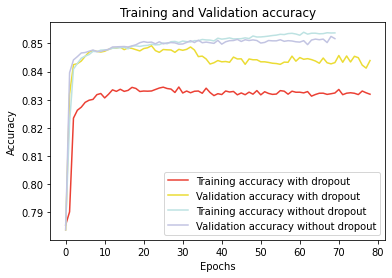

In [ ]:
history_df_2 = pd.DataFrame(history_no_dropout.history)

plt.plot(history_df.loc[:, ['accuracy']], "#EB4034", label='Training accuracy with dropout')
plt.plot(history_df.loc[:, ['val_accuracy']], "#EBDC34", label='Validation accuracy with dropout')
plt.plot(history_df_2.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy without dropout')
plt.plot(history_df_2.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy without dropout')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8705    0.9503    0.9087     30047
           1     0.7264    0.4830    0.5802      8214

    accuracy                         0.8500     38261
   macro avg     0.7985    0.7166    0.7444     38261
weighted avg     0.8396    0.8500    0.8381     38261



## ANN with new kernal initializer

In [ ]:
# Initialising the new NN without
model = Sequential()

model.add(Dense(units = 32, activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))


# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history_xavier = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 16s 7ms/step - loss: 0.4317 - accuracy: 0.8071 - val_loss: 0.3803 - val_accuracy: 0.8322
Epoch 2/150
2232/2232 [==============================] - 12s 5ms/step - loss: 0.3735 - accuracy: 0.8349 - val_loss: 0.3680 - val_accuracy: 0.8383
Epoch 3/150
2232/2232 [==============================] - 10s 4ms/step - loss: 0.3655 - accuracy: 0.8403 - val_loss: 0.3628 - val_accuracy: 0.8414
Epoch 4/150
2232/2232 [==============================] - 10s 4ms/step - loss: 0.3612 - accuracy: 0.8420 - val_loss: 0.3590 - val_accuracy: 0.8449
Epoch 5/150
2232/2232 [==============================] - 11s 5ms/step - loss: 0.3585 - accuracy: 0.8433 - val_loss: 0.3565 - val_accuracy: 0.8463
Epoch 6/150
2232/2232 [==============================] - 11s 5ms/step - loss: 0.3563 - accuracy: 0.8446 - val_loss: 0.3548 - val_accuracy: 0.8472
Epoch 7/150
2232/2232 [==============================] - 10s 4ms/step - loss: 0.3546 - accuracy: 0.8454 - val_loss: 0.3535 -

In [ ]:
# Zeros weight
initializer = initializers.Zeros()

# Initialising the new NN without
model = Sequential()

model.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer, input_dim = 26))
model.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(units = 16, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(units = 8, activation = 'relu', kernel_initializer=initializer))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer=initializer))


# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history_no_init = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.6676 - accuracy: 0.7857 - val_loss: 0.6444 - val_accuracy: 0.7838
Epoch 2/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.6241 - accuracy: 0.7857 - val_loss: 0.6063 - val_accuracy: 0.7838
Epoch 3/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.5900 - accuracy: 0.7857 - val_loss: 0.5769 - val_accuracy: 0.7838
Epoch 4/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.5643 - accuracy: 0.7857 - val_loss: 0.5552 - val_accuracy: 0.7838
Epoch 5/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.5458 - accuracy: 0.7857 - val_loss: 0.5404 - val_accuracy: 0.7838
Epoch 6/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.5335 - accuracy: 0.7857 - val_loss: 0.5311 - val_accuracy: 0.7838
Epoch 7/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.5263 - accuracy: 0.7857 - val_loss: 0.5261 - val_ac

In [ ]:
history_df_2 = pd.DataFrame(history_no_dropout.history)
history_df_3 = pd.DataFrame(history_xavier.history)
history_df_4 = pd.DataFrame(history_no_init.history)

plt.plot(history_df_2.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy with initialize uniform weight')
plt.plot(history_df_2.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy with initialize uniform weight')
plt.plot(history_df_3.loc[:, ['accuracy']], "#EB4034", label='Training accuracy without initialize xavier weight')
plt.plot(history_df_3.loc[:, ['val_accuracy']], "#EBDC34", label='Validation accuracy without initialize xavier weight')
plt.plot(history_df_4.loc[:, ['accuracy']], "#EB4034", label='Training accuracy with zeros')
plt.plot(history_df_4.loc[:, ['val_accuracy']], "#EBDC34", label='Validation accuracy with zeros')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: ignored